finale Gewichte [-0.33610287  0.77867168  0.05831654 -0.37062498]


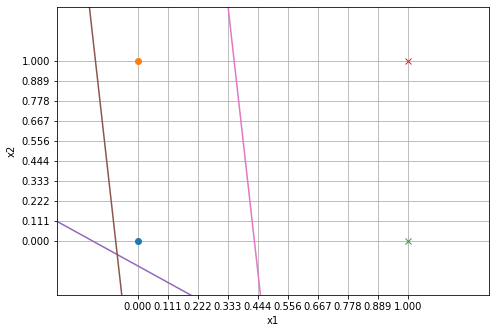

In [99]:
#Bemerkung: Als Aktivierungsfunktion wird Threshold Funktion verwendet (Klasse 1 :falls Input > 0 und Klasse 0 :sonst).
#         Learning Rate = 0.4

import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, no_of_inputs, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = np.random.uniform(low=0, high=1, size=4)
        
           
    def predict(self, inputs):
        '''Diese Funktion berechnet die Gewichtssumme der Eingabe 
           und gibt ihre Klasse mithilfe der Threshold Funktion zurück'''
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0          
        return activation

    def train(self, training_inputs, labels, ax):
        '''Gewichte werden hier mithilfe des Delta Lernregels angepasst
           Diese Funktion läuft bis dahin, dass es keine Fehler mehr gibt'''
            
        while True:
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)  
                
            #gebe die aktuelle Trennlinie nach jeder Iteration zurück
            x = np.linspace(-1,2,100)
            if self.weights[2] == 0: 
                ax.plot(x*self.weights[2] - self.weights[0], x )
            else:
                ax.plot(x, -((self.weights[1]*x+self.weights[0])/self.weights[2]))
            
            #berechnet die aktuelle quadratische Fehler nach jeder Iteration
            currentE = self.SquareError(training_inputs, labels)
            
            #falls es noch keine Fehler gibt, endet das Training
            if currentE == 0:
                break
            
                
            
    def SquareError(self, training_inputs, labels): 
        '''Diese Funktion berechnet den quadratischen Fehler'''
        E = 0
        for inputs, label in zip(training_inputs, labels):
            prediction = self.predict(inputs)
            E = E + (label - prediction)**2
        return (1/2)*E


#Eingabe von Inputs und ihre gehörenden erwarteten Klassen
training_inputs = np.array([(0,0,1), (0,1,0), (1,0,1), (1,1,0)])
labels = [0, 0, 1, 1]


#Initialisere den Graph mit gegeben Eingaben-Punkten
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(ylabel='x2', xlabel='x1')
ax.set_xlim(-0.3,1.3)
ax.set_ylim(-0.3,1.3)
ax.grid(True)
plt.xticks(np.linspace(0,1,10))
plt.yticks(np.linspace(0,1,10))
def GraphInitial(training_inputs, labels, ax):
    '''Diese Funktion visualisiert die Eingaben auf dem Graph 
       mit o für die Eingabe der Klasse 0 und x für die der Klasse 1'''
    for inputs, labels in zip(training_inputs, labels):
        if labels == 0:
            ax.plot(inputs[0],inputs[1],marker="o")
        else: 
            ax.plot(inputs[0],inputs[1],marker="x")
                
GraphInitial(training_inputs, labels, ax)


#Erzeuge eine Perceptron mit 3 Inputs und Learning Rate von 0.4
ExamplePerceptron = Perceptron(3, 0.4)
ExamplePerceptron.train(training_inputs, labels, ax)
print("finale Gewichte", ExamplePerceptron.weights)

plt.show()